### Raster to polygon

In [2]:
import rasterio
from rasterio.features import shapes
import geopandas as gpd
from shapely.geometry import shape

In [3]:
main_dir = 'D:/!!Research/!!!Data/ArcGIS_Projects'
raster_dir = f'{main_dir}/quick_new_poly/files_for_python/merged_rasters/quick_bounds_binary_class.tif'

In [4]:
# Path to the raster file
raster_file = raster_dir

# Read the raster file
with rasterio.open(raster_file) as src:
    raster_data = src.read(1)
    raster_transform = src.transform
    nodata_value = src.nodata

# Mask for the class of interest (assuming class value is 1)
# Create a mask that ignores NODATA values
class_mask = (raster_data == 1) & (raster_data != nodata_value)

# Convert the class mask to polygons
shapes_generator = shapes(raster_data, mask=class_mask, transform=raster_transform)

# Convert shapes to GeoDataFrame
polygons = []
for geom, value in shapes_generator:
    if value == 1:
        polygons.append(shape(geom))

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'geometry': polygons}, crs=src.crs)
gdf = gdf.to_crs(6350)

In [5]:
out_dir = f'{main_dir}/quick_new_poly/files_for_python/rast_to_poly/rast_to_poly.shp'
# Save to a file if needed
gdf.to_file(out_dir)

<Axes: >

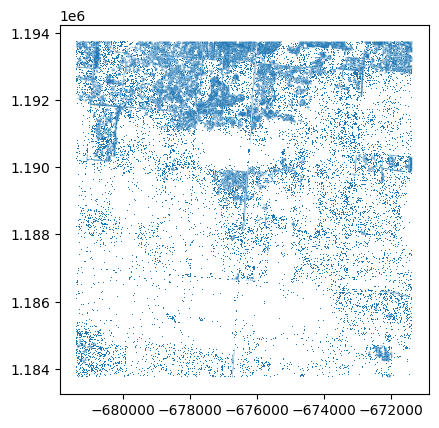

In [6]:
# If you want to visualize the polygons
gdf.plot()